In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import umap
import umap.plot

Using TensorFlow backend.
/Users/dima/University/10_sem/neuro/repo/ENV/lib/python3.8/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
with open("data/tic-tac-toe.names") as file:
    for line in file:
        print(line)

1. Title: Tic-Tac-Toe Endgame database



2. Source Information

   -- Creator: David W. Aha (aha@cs.jhu.edu)

   -- Donor: David W. Aha (aha@cs.jhu.edu)

   -- Date: 19 August 1991

 

3. Known Past Usage: 

   1. Matheus,~C.~J., \& Rendell,~L.~A. (1989).  Constructive

      induction on decision trees.  In {\it Proceedings of the

      Eleventh International Joint Conference on Artificial Intelligence} 

      (pp. 645--650).  Detroit, MI: Morgan Kaufmann.

      -- CITRE was applied to 100-instance training and 200-instance test

         sets.  In a study using various amounts of domain-specific

         knowledge, its highest average accuracy was 76.7% (using the

         final decision tree created for testing).



   2. Matheus,~C.~J. (1990). Adding domain knowledge to SBL through

      feature construction.  In {\it Proceedings of the Eighth National

      Conference on Artificial Intelligence} (pp. 803--808). 

      Boston, MA: AAAI Press.

      -- Similar experiments 

In [4]:
# loading data
df = pd.read_csv("data/tic-tac-toe.data")
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [5]:
# replacing class with ints
target_le = LabelEncoder()
df.Class = target_le.fit_transform(df.Class)
# df = df.replace({"negative": 0,"positive":1})
print(f'target label encoder labels: {target_le.classes_} {list(target_le.transform(target_le.classes_))}')
df

target label encoder labels: ['negative' 'positive'] [0, 1]


,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,1
1,x,x,x,x,o,o,o,x,o,1
2,x,x,x,x,o,o,o,o,x,1
3,x,x,x,x,o,o,o,b,b,1
4,x,x,x,x,o,o,b,o,b,1
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,0
954,o,x,o,x,x,o,x,o,x,0
955,o,x,o,x,o,x,x,o,x,0
956,o,x,o,o,x,x,x,o,x,0


In [29]:
# separate class and it's position info
y = df.Class.values
X = df.copy()

# deleting extra class info
X.drop(columns=['Class'], axis=1, inplace=True)

le = LabelEncoder()

le.fit(X[X.columns[0]])

for feature in X.columns:
    X[feature] = le.transform(X[feature])
print(f'data LabelEncoder labels: {le.classes_} {list(le.transform(le.classes_))}')

encoder = OneHotEncoder()  # using encoding of class_type as this is a multi class problem.
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()  # fitting our data to encoder.
print(f'y = \n{y}')

data LabelEncoder labels: ['b' 'o' 'x'] [0, 1, 2]
y = 
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


CPU times: user 14.1 s, sys: 193 ms, total: 14.3 s
Wall time: 10.5 s
[[16.729168   3.0336866]
 [17.53757    4.4006968]
 [16.847397   3.0547767]
 ...
 [17.55043    3.0261984]
 [16.814562   3.387283 ]
 [16.629173   4.358424 ]]


Text(0.5, 1.0, 'UMAP for tictactoe')

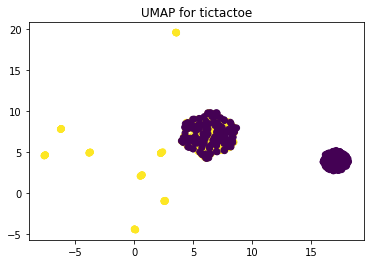

In [7]:
%time mapper = umap.UMAP().fit_transform(X)
print(mapper)
plt.scatter(mapper[:,0], mapper[:,1], c=y)
plt.title('UMAP for tictactoe')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print()
print('Размеры X и y для обучения: ')
print(X_train.shape)
print(y_train.shape)
print('Размеры X и y для тестов: ')
print(X_test.shape)
print(y_test.shape)

y_test


Размеры X и y для обучения: 
(670, 9)
(670, 2)
Размеры X и y для тестов: 
(288, 9)
(288, 2)


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print()
print('Логистическая регрессия: ')
print("training accuracy :", logreg.score(X_train, y_train))
print("testing accuracy :", logreg.score(X_test, y_test))


Логистическая регрессия: 
training accuracy : 0.6880597014925374
testing accuracy : 0.6909722222222222


Normalized confusion matrix
[[0.21052632 0.78947368]
 [0.07253886 0.92746114]]


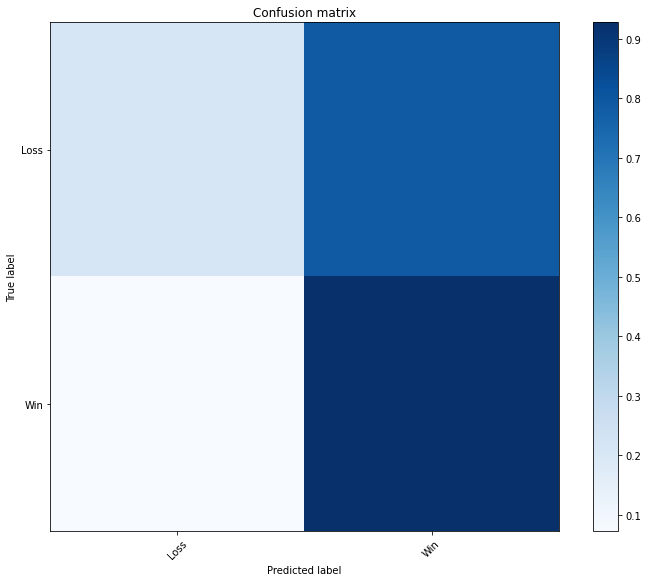

In [10]:
conf_matrix = metrics.confusion_matrix(y_test, logreg.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=['Loss', 'Win'],
                      title='Confusion matrix')
plt.savefig("conf_matrix-logreg.png")
plt.show()


In [11]:
# Дерево решений
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print()
print('Decision Tree: ')
print("training accuracy :", tree.score(X_train, y_train))
print("testing accuracy :", tree.score(X_test, y_test))


Decision Tree: 
training accuracy : 1.0
testing accuracy : 0.9305555555555556


Normalized confusion matrix
[[0.91578947 0.08421053]
 [0.06217617 0.93782383]]


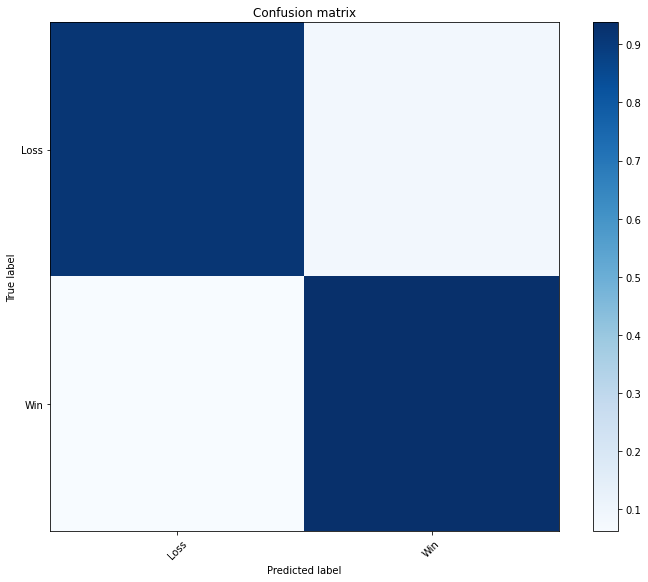

In [12]:
conf_matrix = metrics.confusion_matrix(y_test, tree.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=['Loss', 'Win'],
                      title='Confusion matrix')
plt.savefig("conf_matrix-tree.png")
plt.show()


In [13]:
rndfrst = RandomForestClassifier()
rndfrst.fit(X_train, y_train)
print() 
print('Random forest: ')
print("training accuracy :", rndfrst.score(X_train, y_train))
print("testing accuracy :", rndfrst.score(X_test, y_test))


Random forest: 
training accuracy : 1.0
testing accuracy : 0.9340277777777778


Normalized confusion matrix
[[0.8 0.2]
 [0.  1. ]]


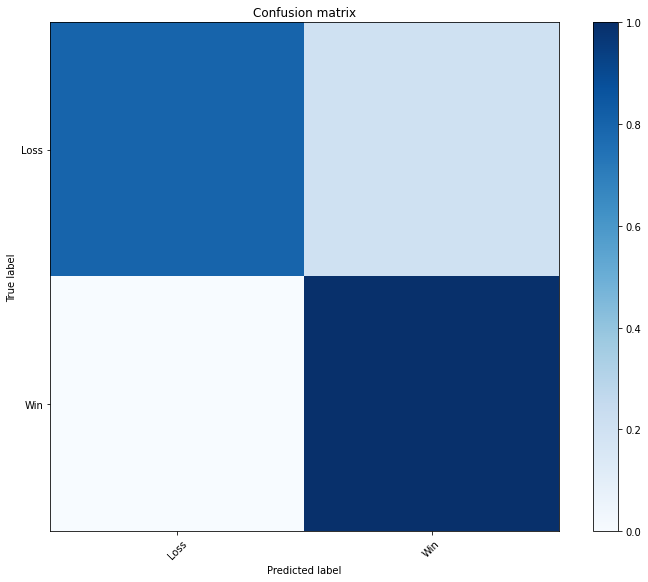

In [14]:
conf_matrix = metrics.confusion_matrix(y_test, rndfrst.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=['Loss', 'Win'],
                      title='Confusion matrix')
plt.savefig("conf_matrix-random-forest.png")
plt.show()

In [15]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
print()
print('Ada boost: ')
print("training accuracy :", ada.score(X_train, y_train))
print("testing accuracy :", ada.score(X_test, y_test))


Ada boost: 
training accuracy : 0.8
testing accuracy : 0.7673611111111112


Normalized confusion matrix
[[0.55789474 0.44210526]
 [0.12953368 0.87046632]]


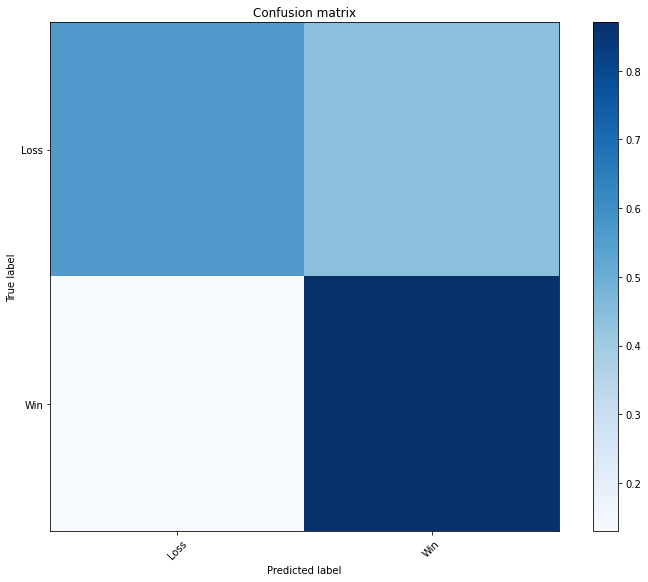

In [16]:
conf_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=['Loss', 'Win'],
                      title='Confusion matrix')
plt.savefig("conf_matrix-ada.png")
plt.show()

In [40]:
model = Sequential()

model.add(Dense(units=200, activation='relu', input_dim=9))  # hiddenlayer1
model.add(Dense(units=400, activation='relu'))  # hiddenlayer2
model.add(Dense(units=2, activation='softmax'))  # outputlayer

In [41]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=9, validation_data=(X_test, y_test))

Train on 670 samples, validate on 288 samples
Epoch 1/50
670/670 [==============================] - 0s 736us/step - loss: 0.6235 - accuracy: 0.6597 - val_loss: 0.5565 - val_accuracy: 0.7326
Epoch 2/50
670/670 [==============================] - 0s 464us/step - loss: 0.5365 - accuracy: 0.7284 - val_loss: 0.5141 - val_accuracy: 0.7431
Epoch 3/50
670/670 [==============================] - 0s 402us/step - loss: 0.4760 - accuracy: 0.7821 - val_loss: 0.5078 - val_accuracy: 0.7326
Epoch 4/50
670/670 [==============================] - 0s 409us/step - loss: 0.4436 - accuracy: 0.7836 - val_loss: 0.4945 - val_accuracy: 0.7674
Epoch 5/50
670/670 [==============================] - 0s 381us/step - loss: 0.4139 - accuracy: 0.8179 - val_loss: 0.4368 - val_accuracy: 0.8021
Epoch 6/50
670/670 [==============================] - 0s 387us/step - loss: 0.3713 - accuracy: 0.8373 - val_loss: 0.4521 - val_accuracy: 0.7917
Epoch 7/50
670/670 [==============================] - 0s 391us/step - loss: 0.3335 - accur

In [42]:
# Процент правильных угадываний
print(f'Точность модели = {model.evaluate(X_test, y_test)[1]}')

288/288 [==============================] - 0s 47us/step
Точность модели = 0.9409722089767456


In [43]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Normalized confusion matrix
[[0.83157895 0.16842105]
 [0.00518135 0.99481865]]


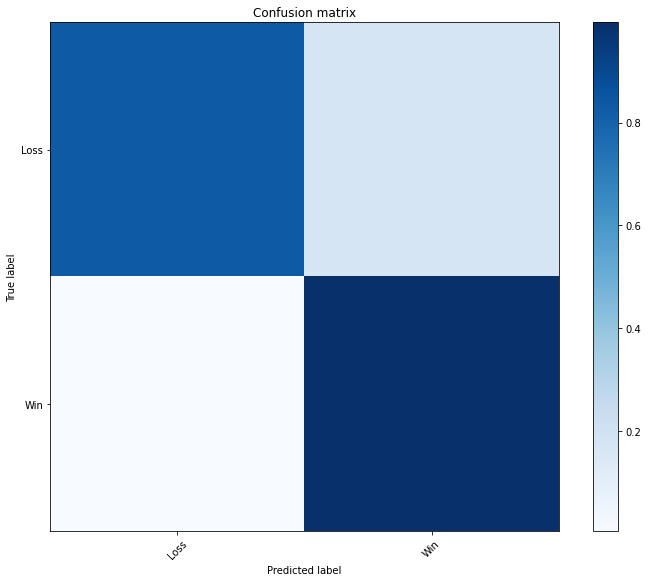

In [44]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
y_correct = [np.argmax(i) for i in y_test]

conf_matrix = metrics.confusion_matrix(y_correct, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=['Loss', 'Win'],
                      title='Confusion matrix')
plt.savefig("conf_matrix-nn.png")
plt.show()